epoch=0, slope=0.8750, intercept=0.3000, error=41.0000
epoch=100, slope=2.0456, intercept=0.8658, error=0.0031
epoch=200, slope=2.0215, intercept=0.9367, error=0.0007
epoch=300, slope=2.0102, intercept=0.9701, error=0.0002
epoch=400, slope=2.0048, intercept=0.9859, error=0.0000
epoch=500, slope=2.0023, intercept=0.9934, error=0.0000
epoch=600, slope=2.0011, intercept=0.9969, error=0.0000
epoch=700, slope=2.0005, intercept=0.9985, error=0.0000
epoch=800, slope=2.0002, intercept=0.9993, error=0.0000
epoch=900, slope=2.0001, intercept=0.9997, error=0.0000
epoch=1000, slope=2.0001, intercept=0.9998, error=0.0000
epoch=1100, slope=2.0000, intercept=0.9999, error=0.0000
epoch=1200, slope=2.0000, intercept=1.0000, error=0.0000
epoch=1300, slope=2.0000, intercept=1.0000, error=0.0000
epoch=1400, slope=2.0000, intercept=1.0000, error=0.0000
epoch=1500, slope=2.0000, intercept=1.0000, error=0.0000
epoch=1600, slope=2.0000, intercept=1.0000, error=0.0000
epoch=1700, slope=2.0000, intercept=1.0000

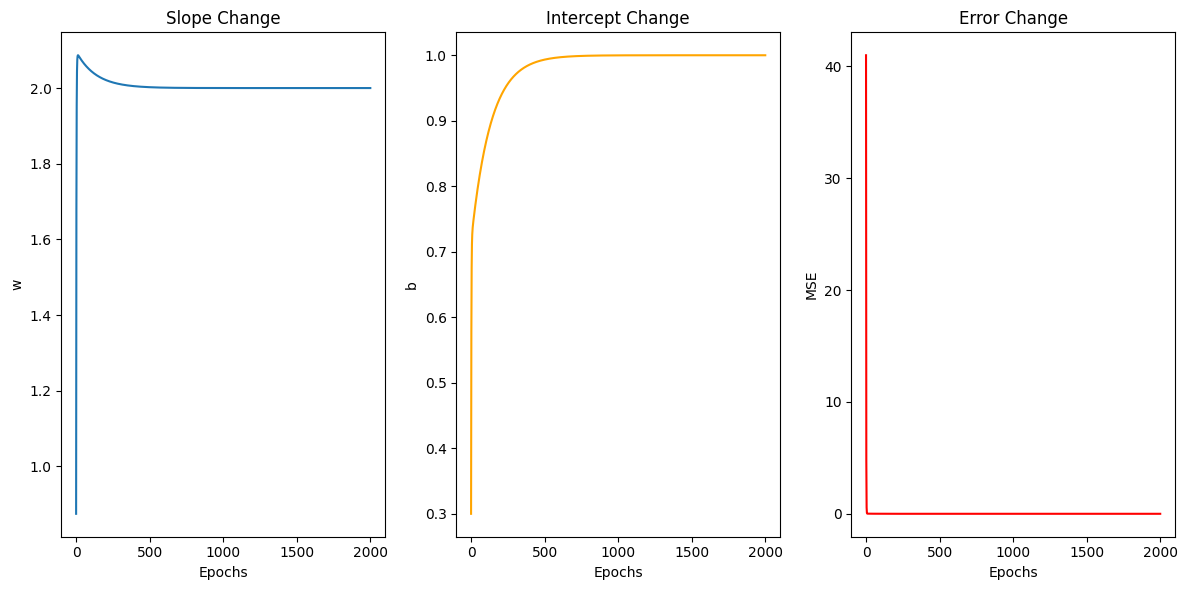

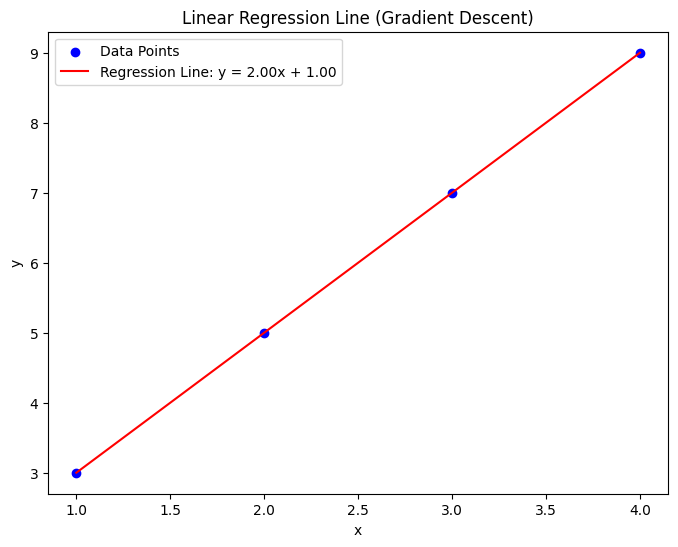

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 셋업
data = [[1, 3], [2, 5], [3, 7], [4, 9]]
x = [i[0] for i in data]  # x 값
y = [i[1] for i in data]  # y 값

x_data = np.array(x) # numpy 배열로 변환
y_data = np.array(y)

# 초기화
w = 0  # 기울기 초기화
b = 0  # y절편 초기화
learning_rate = 0.05  # Learning rate(학습률)
epochs = 2001  # 반복횟수 설정

# 기록할 변수들 초기화
w_history = []  # 기울기 기록용 초기화
b_history = []  # y절편 기록용 초기화
error_history = []  # 오차(MSE) 기록용 초기화

# 경사하강법
for i in range(epochs):
    y_pred = w * x_data + b  # 예측된 y값
    error = y_data - y_pred  # 오차(실제값과 예측값 차이)

    # 기울기 계산
    w_diff = -(1 / len(x_data)) * sum(x_data * error) # 기울기 미분값
    b_diff = -(1 / len(x_data)) * sum(error) # y절편 미분값

    # 파라미터 업데이트
    w = w - learning_rate * w_diff # 기울기 업데이트
    b = b - learning_rate * b_diff # y절편 업데이트

    # epoch마다 기울기, 절편, 오차 기록
    w_history.append(w)
    b_history.append(b)
    error_history.append(np.mean(error**2))  # 평균제곱오차(MSE) 계산

    # epoch 100번마다 값 기록
    if i % 100 == 0:
        print(f"epoch={i}, slope={w:.04f}, intercept={b:.04f}, error={np.mean(error**2):.04f}")

# 그래프그리기
plt.figure(figsize=(12, 6))

# 기울기 w 변화 그래프
plt.subplot(1, 3, 1)
plt.plot(range(epochs), w_history, label='Slope (w)')
plt.xlabel('Epochs')
plt.ylabel('w')
plt.title('Slope Change')

# y절편 b 변화 그래프
plt.subplot(1, 3, 2)
plt.plot(range(epochs), b_history, label='Intercept (b)', color='orange')
plt.xlabel('Epochs')
plt.ylabel('b')
plt.title('Intercept Change')

# 오차(MSE) 변화 그래프
plt.subplot(1, 3, 3)
plt.plot(range(epochs), error_history, label='Error (MSE)', color='red')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Error Change')

plt.tight_layout() # 그래프 요소들(축,제목 등)이 겹치지 않게 자동으로 조정
plt.show()

# 경사하강법 학습 후 선형회귀 직선 그리기
plt.figure(figsize=(8, 6))

# 원본 데이터 산점도
plt.scatter(x, y, color='blue', label='Data Points')

# 학습된 기울기 w와 y절편 b를 이용하여 선형회귀 직선 그리기
y_regression = w * x_data + b
plt.plot(x, y_regression, color='red', label=f'Regression Line: y = {w:.2f}x + {b:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Line (Gradient Descent)')
plt.legend()

plt.show()